# House Price Prediction using multiple linear regression

Author: Ajay Biswas
National Institute of Technology, Rourkela 

In this assignment, we have to predict house prices and measure prediction error using multiple regression. It is a statistical technique that uses several explanatory variables to predict the outcome of a response variable. The goal of multiple linear regression (MLR) is to model the linear relationship between the explanatory (independent) variables and response (dependent) variable.

## Multiple Regression Formula

>$Y=XB + e$

>$B = (X'X)^{-1}X'Y$

>$Y -> N\times1 $ column matrix of cases scores on dependent variable.

>$X -> N\times(K+1)$ matrix of cases on independent varaiable.

>$B -> (K+1)\times1$ column matrix containing regression constant and coefficients.

>$e -> N\times1$ column matrix of cases of error prediction.

In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt

### Load Dataset

In [2]:
# load csv
csvfile = pd.read_csv("Real estate valuation data set.csv") 
display(csvfile)

# loading dataset into an array
dataset = csvfile.values

# Loading real House price in Y
Y = dataset[:,6]
n = len(Y)

,No,X1 house age,X2 distance to the nearest MRT station,X3 no of convenience stores,X4 latitude,X5 longitude,Y house price of unit area
0,1,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,410,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,8.1,104.81010,5,24.96674,121.54067,52.5


In [3]:
# Setting X

X = np.zeros((n,6))

X[:,1:6] = dataset[:,1:6] 
X[:,0] = np.ones(n)
print('X: ',X)

X:  [[  1.       32.       84.87882  10.       24.98298 121.54024]
 [  1.       19.5     306.5947    9.       24.98034 121.53951]
 [  1.       13.3     561.9845    5.       24.98746 121.54391]
 ...
 [  1.       18.8     390.9696    7.       24.97923 121.53986]
 [  1.        8.1     104.8101    5.       24.96674 121.54067]
 [  1.        6.5      90.45606   9.       24.97433 121.5431 ]]


In [4]:
# calculating B
B = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),Y)
print('B: ',B)

B:  [-4.94559481e+03 -2.68916833e-01 -4.25908901e-03  1.16302048e+00
  2.37767190e+02 -7.80545509e+00]


In [5]:
# Fitting Y
Y_hat = np.dot(X,B)

In [6]:
# error prediction
e = Y - Y_hat 

In [7]:
# Error Table
e_tab = np.zeros((len(Y),4))
e_tab[:,0] = np.arange(1,len(Y)+1,dtype=int)
e_tab[:,1] = Y
e_tab[:,2] = Y_hat
e_tab[:,3] = e

et = pd.DataFrame(e_tab, columns = ['Standard Order', 'Actual Value(Y)', 'Fitted Value(Y_hat)','Residual'])

print('\nError Table for Multiple Regression\n')
display(et)

# Saving tables to output folder
et.to_csv (r'..\output\table_m1.csv', index = False, header=True)



Error Table for Multiple Regression



,Standard Order,Actual Value(Y),Fitted Value(Y_hat),Residual
0,1.0,37.9,48.524624,-10.624624
1,2.0,42.2,49.156749,-6.956749
2,3.0,47.3,46.742782,0.557218
3,4.0,54.8,46.742782,8.057218
4,5.0,43.1,47.792728,-4.692728
...,...,...,...,...
409,410.0,15.4,15.225097,0.174903
410,411.0,50.0,52.358244,-2.358244
411,412.0,40.6,46.392936,-5.792936
412,413.0,52.5,45.187050,7.312950


In [8]:
mae = np.mean(abs(e))
print('Mean Absolute Error: ',mae)

Mean Absolute Error:  6.1748685283007365


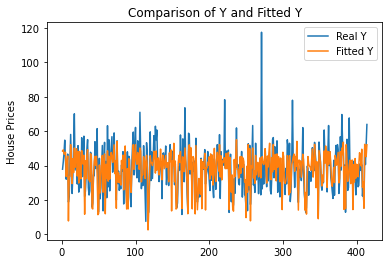

In [9]:
x = np.arange(1,415)
plt.ylabel('House Prices')
plt.title('Comparison of Y and Fitted Y')
plt.plot(x, Y, linestyle='-')
plt.plot(x, Y_hat, linestyle='-')
plt.legend(["Real Y","Fitted Y"])